# Import learning data

In [57]:
import pandas as pd

training_data_path = "../learning_data/data/win_rate/flop/50000-data-1000-simulation-2-players-win-rate-data.csv"
test_data_path = "../learning_data/data/win_rate/flop/10000-data-1000-simulation-2-players-win-rate-data.csv"
train_df = pd.read_csv(training_data_path)
test_df = pd.read_csv(test_data_path)

# About learning data

In [58]:
print train_df.shape, test_df.shape

(50000, 11) (10000, 11)


In [60]:
train_df.head()

,hole1,hole2,community1,community2,community3,win_rate,hole1_id,hole2_id,community1_id,community2_id,community3_id
0,D8,CA,DQ,S3,CT,0.530,21,1,25,42,10
1,S5,HJ,C3,D9,HQ,0.464,44,37,3,22,38
2,SA,S6,CK,H3,S5,0.564,40,45,13,29,44
3,HT,H5,C9,H9,C4,0.659,36,31,9,35,4
4,S8,HJ,CQ,HQ,DK,0.598,47,37,12,38,26


In [61]:
train_df.describe()

,win_rate,hole1_id,hole2_id,community1_id,community2_id,community3_id
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000
mean,0.585123,26.56732,26.665580,26.460660,26.50524,26.478420
std,0.154800,15.00334,15.014355,15.013101,15.02638,15.030976
min,0.248000,1.00000,1.000000,1.000000,1.00000,1.000000
25%,0.461000,14.00000,14.000000,13.000000,13.00000,13.000000
50%,0.579000,27.00000,27.000000,26.000000,26.00000,26.000000
75%,0.680000,40.00000,40.000000,39.000000,40.00000,39.000000
max,1.000000,52.00000,52.000000,52.000000,52.00000,52.000000


In [62]:
test_df.describe()

,win_rate,hole1_id,hole2_id,community1_id,community2_id,community3_id
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.586272,26.592700,26.486300,26.434500,26.454800,26.452700
std,0.154742,15.059531,15.019759,15.042777,14.962638,15.058481
min,0.273000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.461000,13.000000,13.000000,13.000000,13.000000,13.000000
50%,0.579000,27.000000,27.000000,27.000000,26.000000,26.000000
75%,0.681000,40.000000,40.000000,39.000000,40.000000,40.000000
max,1.000000,52.000000,52.000000,52.000000,52.000000,52.000000


# Data Processing

## card id -> 1-hot vector

In [63]:
import numpy as np

gen_one_hot = lambda target_ids: [1 if i in target_ids else 0 for i in range(1,53)]
fetch_hole = lambda row: [row[key] for key in ['hole1_id', 'hole2_id']]
fetch_community = lambda row: [row[key] for key in ['community1_id', 'community2_id', 'community3_id']]

train_hole_one_hot = train_df.apply(lambda row: gen_one_hot(fetch_hole(row)), axis=1)
train_community_one_hot = train_df.apply(lambda row: gen_one_hot(fetch_community(row)), axis=1)
train_df["onehot"] = train_hole_one_hot + train_community_one_hot

test_hole_one_hot = test_df.apply(lambda row: gen_one_hot(fetch_hole(row)), axis=1)
test_community_one_hot = test_df.apply(lambda row: gen_one_hot(fetch_community(row)), axis=1)
test_df["onehot"] = test_hole_one_hot + test_community_one_hot

## Format data (pandas.df -> numpy.ndarray)

In [65]:
to_ndarray = lambda X: np.array([np.array(x) for x in X])
train_x, train_y = [to_ndarray(array) for array in [train_df["onehot"].values, train_df["win_rate"].values]]
test_x, test_y = [to_ndarray(array) for array in [test_df["onehot"].values, test_df["win_rate"].values]]
print "shape of training data => x: %s, y: %s" % (train_x.shape, train_y.shape)
print "shape of test data => x: %s, y: %s" % (test_x.shape, test_y.shape)

shape of training data => x: (50000, 104), y: (50000,)
shape of test data => x: (10000, 104), y: (10000,)


# Create model

In [66]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(60, input_dim=104))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss="mse",  optimizer="rmsprop")

# Train model

In [67]:
history = model.fit(train_x, train_y, batch_size=128, nb_epoch=1000, validation_split=0.1, verbose=0)

# Check model performance

## Visualize loss transition

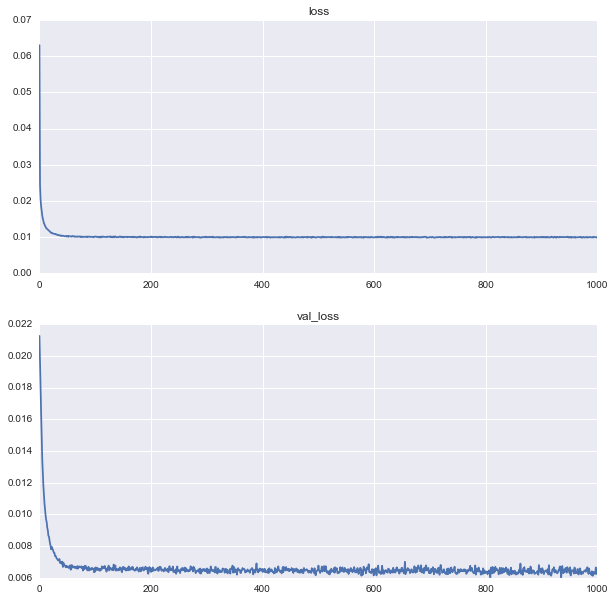

In [68]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for idx, key in enumerate(history.history, start=1):
    plt.subplot(2, 1, idx)
    plt.plot(range(len(history.history[key])), history.history[key])
    plt.title(key)
plt.show()

## Test model performance by MSE 

In [69]:
from sklearn.metrics import mean_squared_error

def print_model_performance(model, train_x, train_y, test_x, test_y):
    print 'MSE on training data = {score}'.format(score=mean_squared_error(model.predict(train_x), train_y))
    print 'MSE on test data = {score}'.format(score=mean_squared_error(model.predict(test_x), test_y))

In [70]:
print_model_performance(model, train_x, train_y, test_x, test_y)

MSE on training data = 0.00609130123416
MSE on test data = 0.00640453994673


## See model prediction on sample data

In [71]:
from pypokerengine.engine.card import Card
C, D, H, S = Card.CLUB, Card.DIAMOND, Card.HEART, Card.SPADE

test_case = [
    [(4, C), (10, S), (10, D), (1, C), (10, H), 0.954],
    [(4, S), (2, S), (12, D), (11, C), (10, D), 0.274],
    [(1, H), (11, H), (8, D), (3, C), (7, D), 0.507]
]

gen_one_hot = lambda target_ids: [1 if i in target_ids else 0 for i in range(1,53)]
to_id = lambda card: card.to_id()

for card1, card2, card3, card4, card5, expected in test_case:
    cards = [Card(rank=rank, suit=suit) for rank, suit in [card1, card2, card3, card4, card5]]
    hole = cards[:2]
    community = cards[2:]
    hole_onehot = gen_one_hot(map(to_id, hole))
    community_onehot = gen_one_hot(map(to_id, community))
    x = hole_onehot + community_onehot
    X = np.array([x])
    y = model.predict(X)[0][0]
    print "HOLE = [%s, %s], COMMUNITY = [%s, %s, %s] => win_rate = { prediction=%f, expected=%f }" % tuple(map(str, hole) + map(str, community) + [y , expected])

HOLE = [C4, ST], COMMUNITY = [DT, CA, HT] => win_rate = { prediction=0.831276, expected=0.954000 }
HOLE = [S4, S2], COMMUNITY = [DQ, CJ, DT] => win_rate = { prediction=0.358122, expected=0.274000 }
HOLE = [HA, HJ], COMMUNITY = [D8, C3, D7] => win_rate = { prediction=0.560378, expected=0.507000 }
